# Exploratoy data analysis 
## Objectives:
- Explore the clean dataset by performing univariate analysis
- Investiage the relationships between the features and my target by perofrming bivariate and multivariate analyses
- Extract relevant insights to share with business stakeholders

In [21]:
# Imports
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [43]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

## Data ingestion
Here we import the cleaned csv dataset

In [23]:
dataframe = pd.read_csv("/mnt/c/Users/haanh/api-behavior-anomaly/data/supervised_clean_data.csv")

In [24]:
# Read the first 5 lines for inspection
dataframe.head()

,Unnamed: 0,_id,inter_api_access_duration(sec),api_access_uniqueness,sequence_length(count),vsession_duration(min),ip_type,num_sessions,num_users,num_unique_apis,source,classification,is_anomaly
0,0,1f2c32d8-2d6e-3b68-bc46-789469f2b71e,0.000812,0.004066,85.643243,5405,default,1460.0,1295.0,451.0,E,normal,False
1,1,4c486414-d4f5-33f6-b485-24a8ed2925e8,0.000063,0.002211,16.166805,519,default,9299.0,8447.0,302.0,E,normal,False
2,2,7e5838fc-bce1-371f-a3ac-d8a0b2a05d9a,0.004481,0.015324,99.573276,6211,default,255.0,232.0,354.0,E,normal,False
3,3,82661ecd-d87f-3dff-855e-378f7cb6d912,0.017837,0.014974,69.792793,8292,default,195.0,111.0,116.0,E,normal,False
4,4,d62d56ea-775e-328c-8b08-db7ad7f834e5,0.000797,0.006056,14.952756,182,default,272.0,254.0,23.0,E,normal,False


In [25]:
# Data inspection
dataframe.shape

(1695, 13)

1695 rows, 12 columns - This is expected according to how I performed data cleaning

In [26]:
# Quick overview of the cleaned dataset
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1695 entries, 0 to 1694
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Unnamed: 0                      1695 non-null   int64  
 1   _id                             1695 non-null   object 
 2   inter_api_access_duration(sec)  1695 non-null   float64
 3   api_access_uniqueness           1695 non-null   float64
 4   sequence_length(count)          1695 non-null   float64
 5   vsession_duration(min)          1695 non-null   int64  
 6   ip_type                         1695 non-null   object 
 7   num_sessions                    1695 non-null   float64
 8   num_users                       1695 non-null   float64
 9   num_unique_apis                 1695 non-null   float64
 10  source                          1695 non-null   object 
 11  classification                  1695 non-null   object 
 12  is_anomaly                      16

In [27]:
# Check if there is still missing value
dataframe.isna().sum()

Unnamed: 0                        0
_id                               0
inter_api_access_duration(sec)    0
api_access_uniqueness             0
sequence_length(count)            0
vsession_duration(min)            0
ip_type                           0
num_sessions                      0
num_users                         0
num_unique_apis                   0
source                            0
classification                    0
is_anomaly                        0
dtype: int64

No missing value in the clean dataset. Cleaning dataset was a success.

In [28]:
# Attain the number of different IP types
# We might want to predict if the IP types affect the rate of abnormal API calls
unique_ip_type = dataframe["ip_type"].unique()
print(f"The IP types are: {unique_ip_type}")

The IP types are: ['default' 'datacenter']


In [29]:
# Attain the count of each IP type
ip_type_count = dataframe["ip_type"].value_counts()
print(ip_type_count)

ip_type
default       1542
datacenter     153
Name: count, dtype: int64


There is a class imbalance concerning the IP type in this dataset, where the number of API calls made from default are about 10 times more than the number of API calls made from datacenter.

/tmp/ipykernel_832/3529200376.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




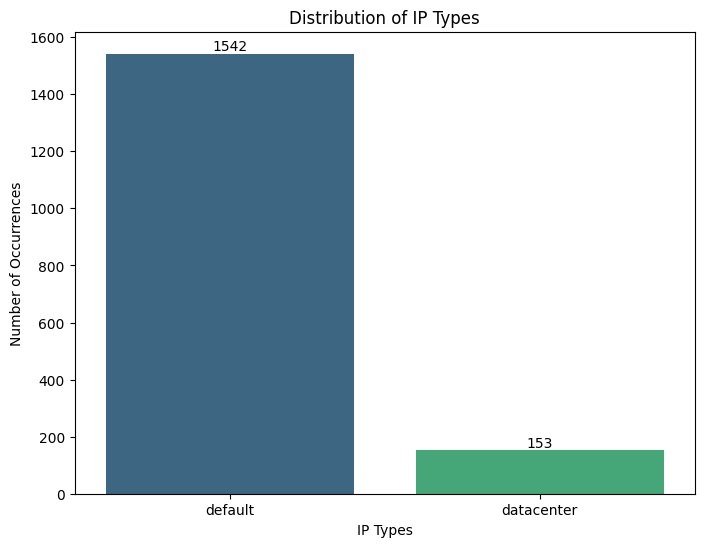

In [ ]:
# Plotting the distribution of IP types
# Creating a bar plot

# Step 1: Convert the series attained from the previous step into a dataframe
ip_type_count = dataframe["ip_type"].value_counts().reset_index()
ip_type_count.columns = ["IP Types", "Count"]  # Rename columns

# Step 2: Creating a bar plot
plt.figure(figsize=(8, 6))  
bar_plot = sns.barplot(
    data=ip_type_count,
    x="IP Types",
    y="Count",
    palette="viridis"  
)

# Adding the title and labels
plt.title("Distribution of IP Types")
plt.xlabel("IP Types")
plt.ylabel("Number of Occurrences")

# Displaying the count as text on the bars
for p in bar_plot.patches:
    bar_plot.annotate(  # annotate() is to add text to the plot
        f'{int(p.get_height())}',  # get_height() is to get the count of each IP type
        (p.get_x() + p.get_width() / 2., p.get_height()), # calculate the position for the annotation text
        ha='center',  # center the text horizontally
        va='bottom'  # position the text just above the bar
    )

# Showing the bar plot
plt.show()

## The relationship between feature and target
This section performs a bi-variate analysis by looking at the distributions of normal vs outliers. This can help in determining what data and feature selection to perform.

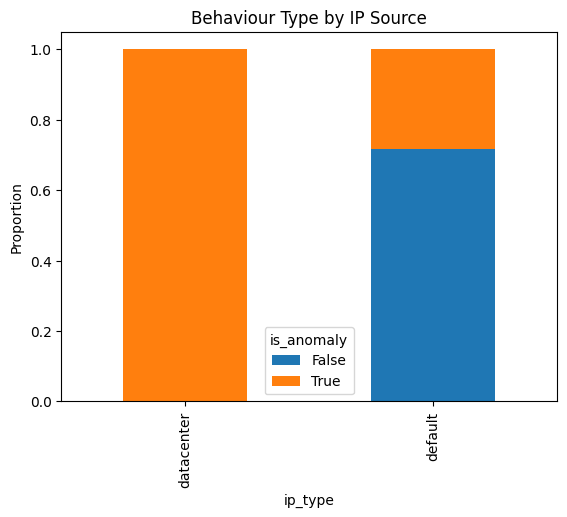

In [53]:
def proportion_plot(data, category_col, value_col, title):
    # Calculate and format proportions of one categorical variable based on another categorical variable
    proportions = data.groupby(category_col)[value_col].value_counts(normalize=True).unstack()
    
    # Plot
    # (I tried using Pandas' plotting ability)
    proportions.plot(kind='bar', stacked=True)
    plt.title(title)
    plt.xlabel(category_col)
    plt.ylabel('Proportion')
    plt.legend(title=value_col)
    plt.show()

# The relationship between IP type and abnormal API calls
proportion_plot(dataframe, "ip_type", "is_anomaly", "Behaviour Type by IP Source")

### Observation
If the API call comes from a datacenter, it is certain that it is an outlier API call (or abnormal API call) 

## Hypothesis

My question: Are shorter sessions with high speed inter API calls more abnormal?

Nomally, if a lot of events happen in a short period of time, this can signal bot or other malicious activity.

Does this trend apply to the chosen dataset? We will plot a chart to find out

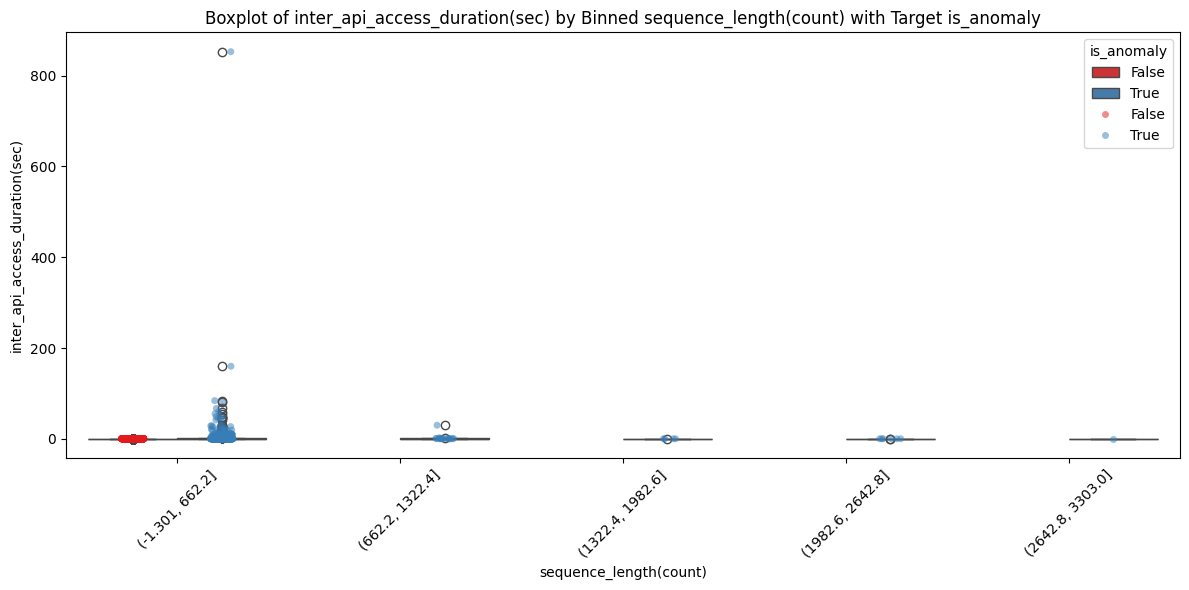

In [58]:
def boxplot_by_bin_with_target(data, column_to_bin, numeric_column, target):
    # Create bins for the column_to_bin
    bins = pd.cut(data[column_to_bin], bins=5)  # You can adjust the number of bins as needed

    # Add the binned data to the DataFrame
    data['binned'] = bins

    # Create the boxplot using seaborn
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='binned', y=numeric_column, hue=target, data=data, palette='Set1', dodge=True)

    # Overlay with stripplot to show individual points
    sns.stripplot(x='binned', y=numeric_column, hue=target, data=data, palette='Set1', dodge=True, alpha=0.5)

    # Adding title and labels
    plt.title(f'Boxplot of {numeric_column} by Binned {column_to_bin} with Target {target}')
    plt.xlabel(column_to_bin)
    plt.ylabel(numeric_column)
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title=target, loc='upper right')
    
    # Show the plot
    plt.tight_layout()
    plt.show()

# Example usage
boxplot_by_bin_with_target(dataframe, "sequence_length(count)", "inter_api_access_duration(sec)", "is_anomaly")

It seems that with this dataset, shorter sessions with higher interspeed API tend to be anomalous

## Summary of exploratory data analysis
- Most of the traffic comes from the default source. About 10% of traffic comes from datacenter
- All the datacenter traffic is considered to be anomalous
- Shorter sessions with higher interspeed API tend to be anomalous
